<a href="https://colab.research.google.com/github/harishkumarsg/CodSoft/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
data = pd.read_csv("/content/IRIS.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [8]:
df = data.copy()

In [9]:
df['species'] = df['species'].replace({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
sns.set_palette('Set2')

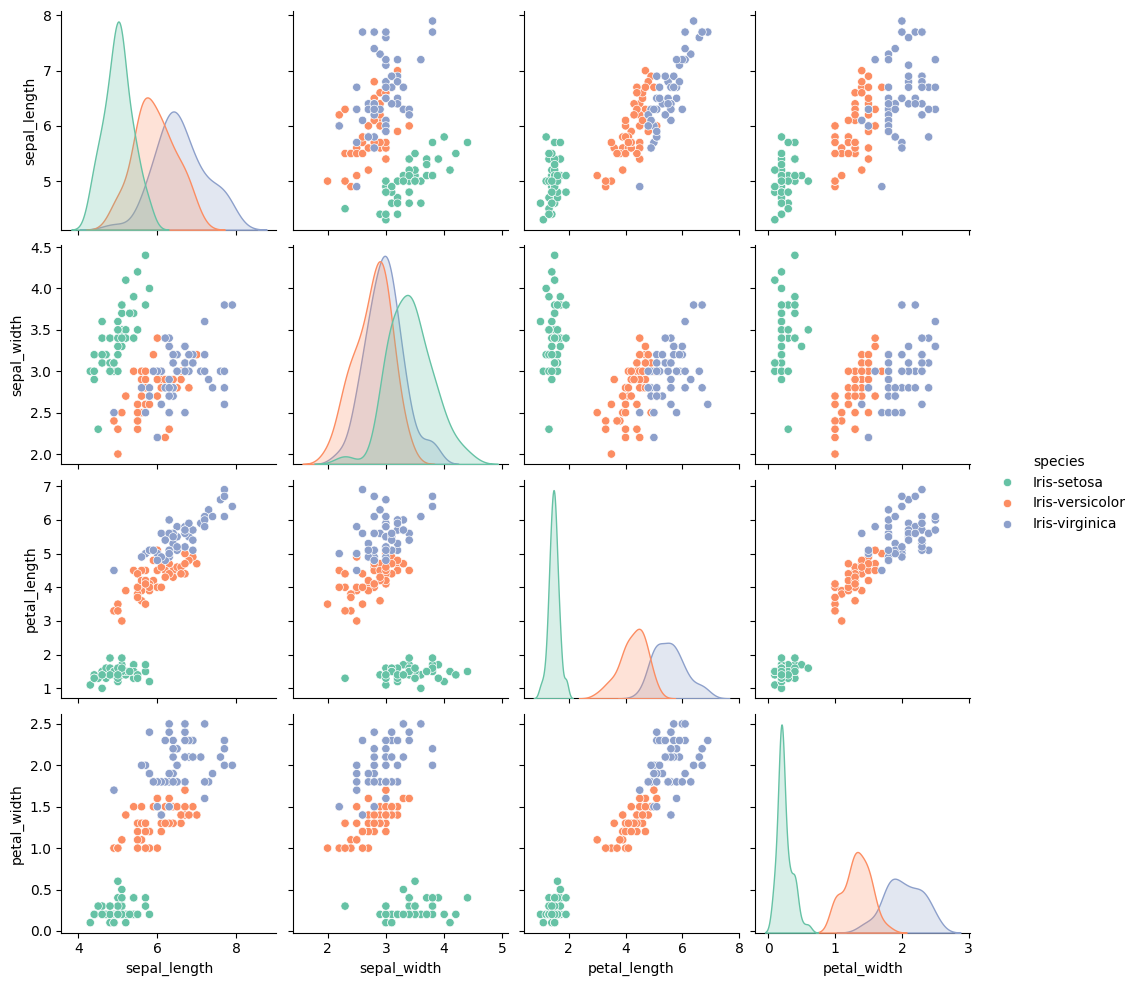

In [11]:
sns.pairplot(df, hue='species')

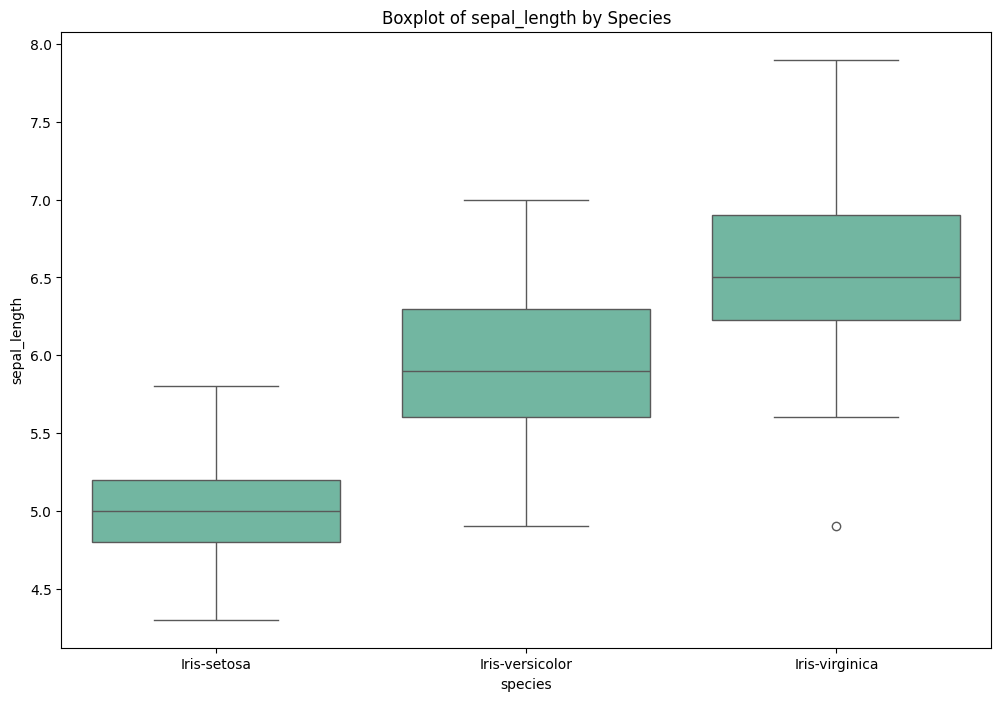

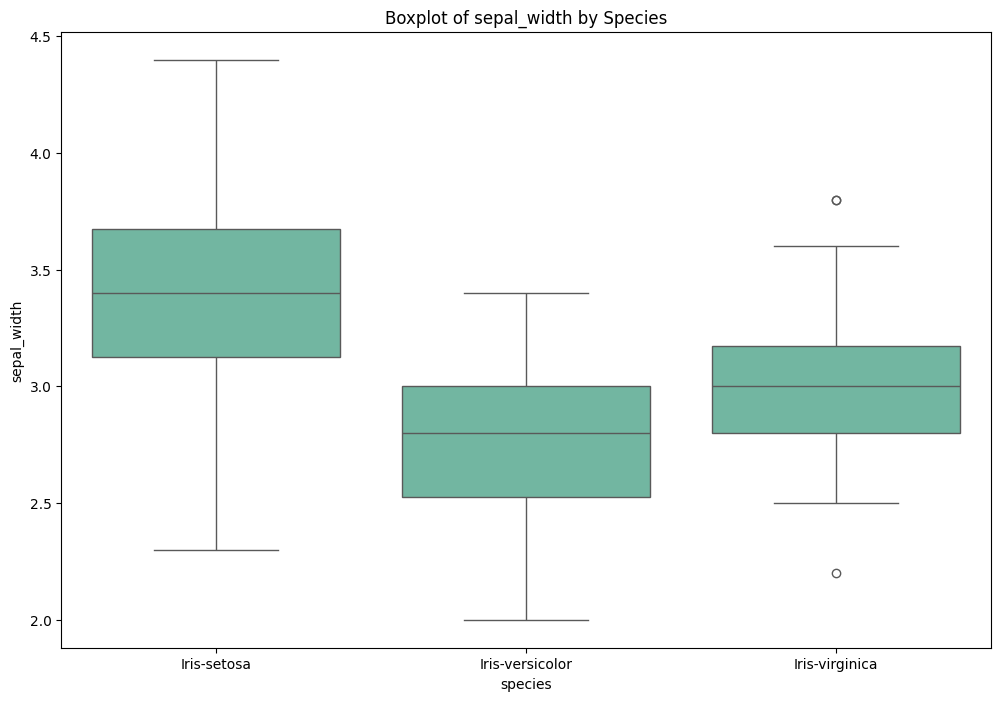

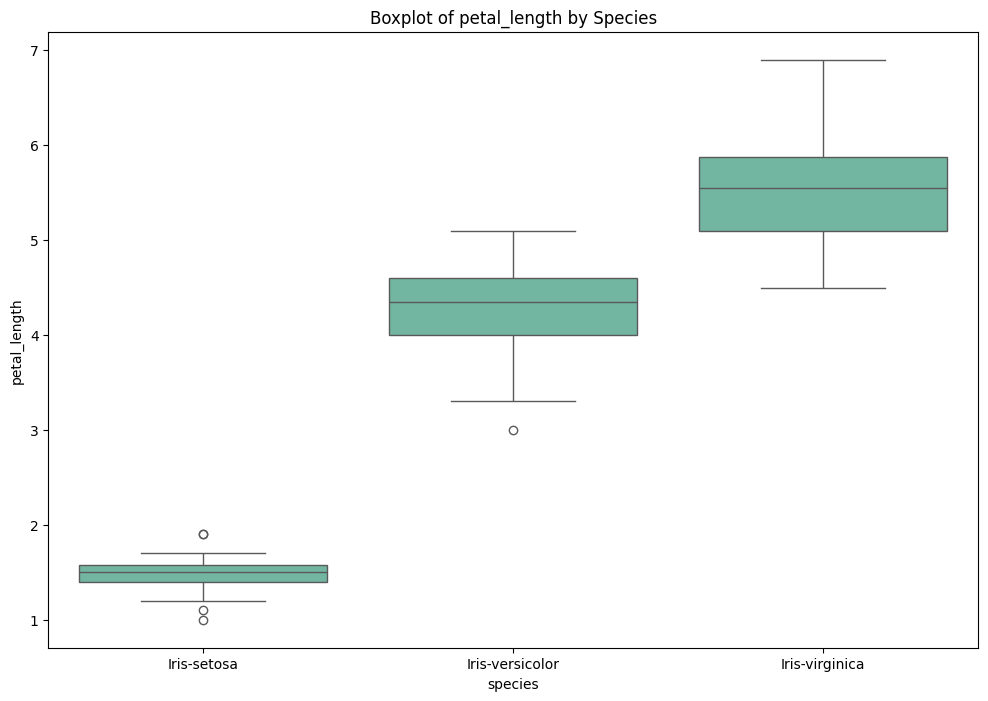

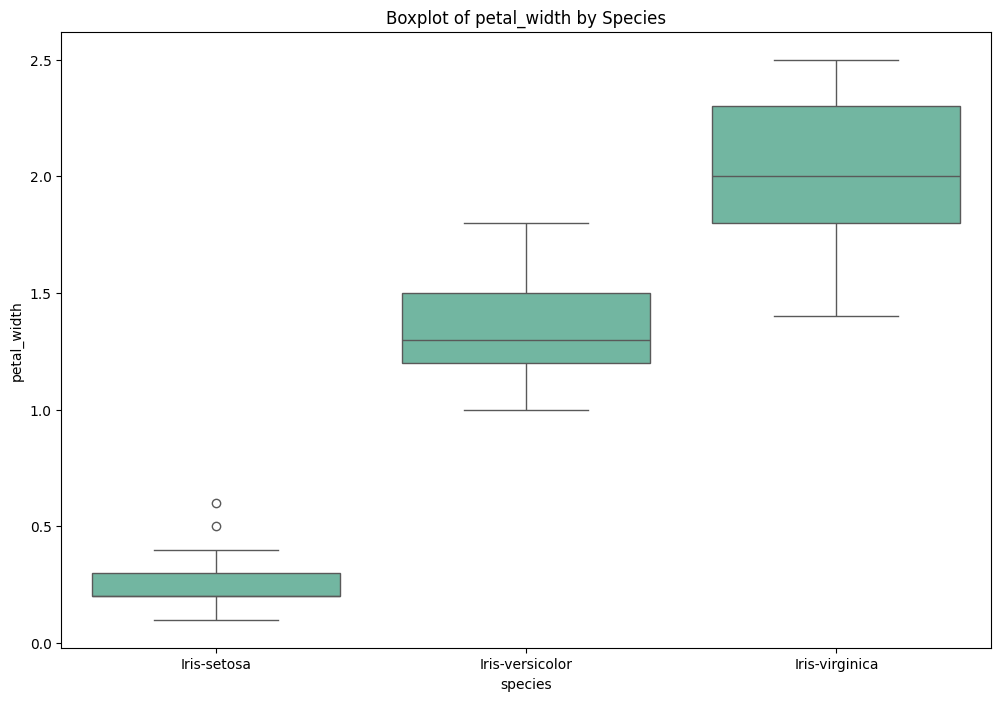

In [12]:
for value in df.drop(columns=['species']):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data = df , x = 'species', y = df[value])
    plt.title(f'Boxplot of {value} by Species')
    plt.show()

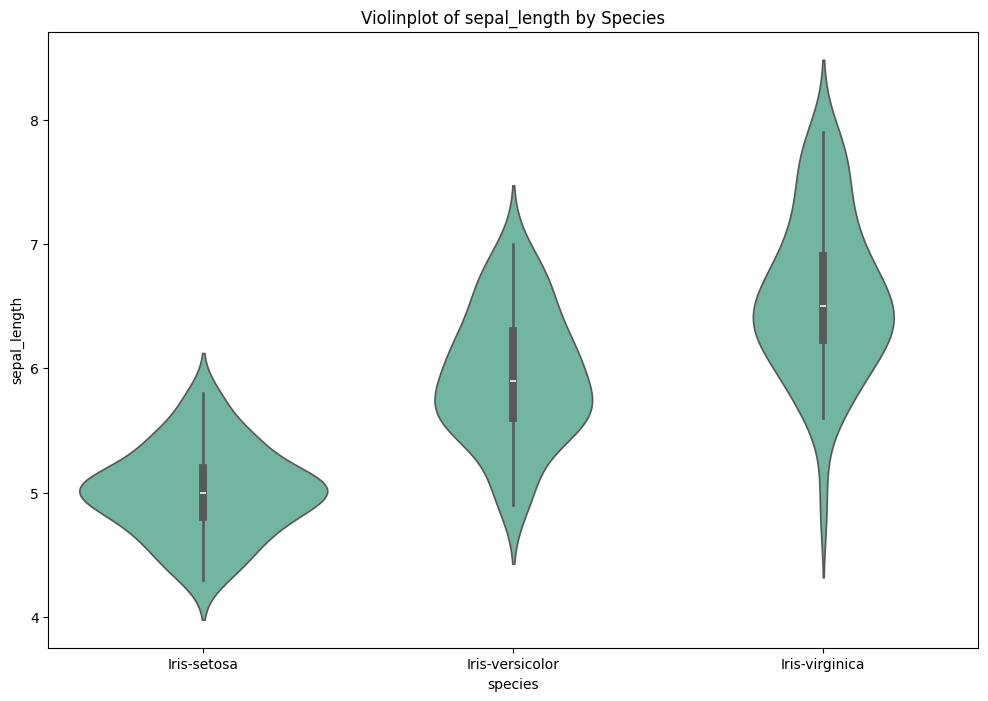

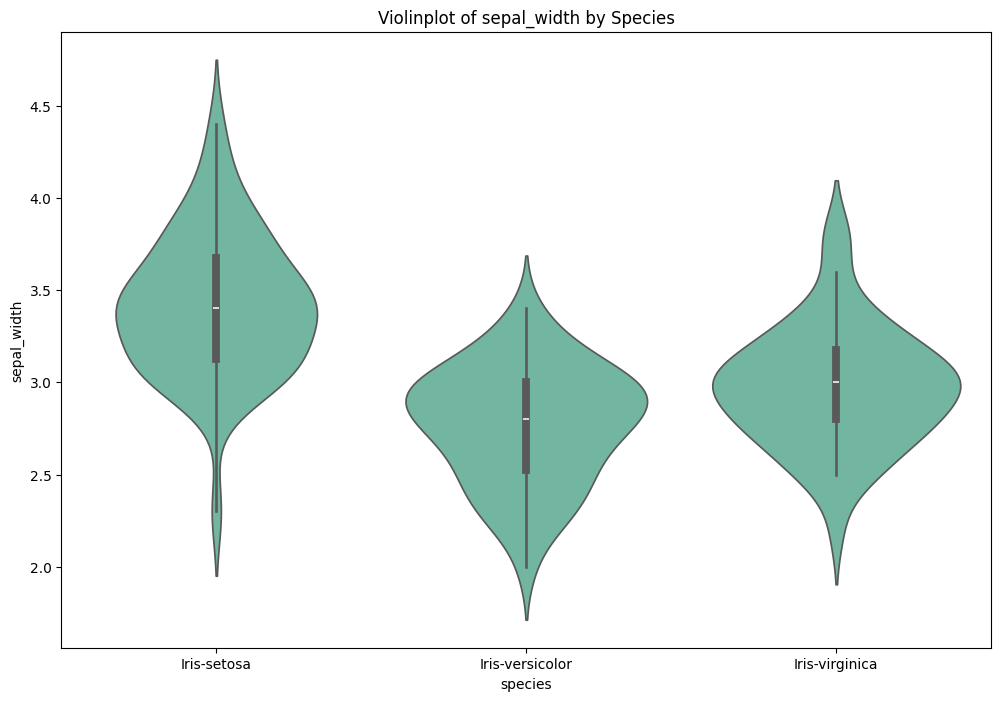

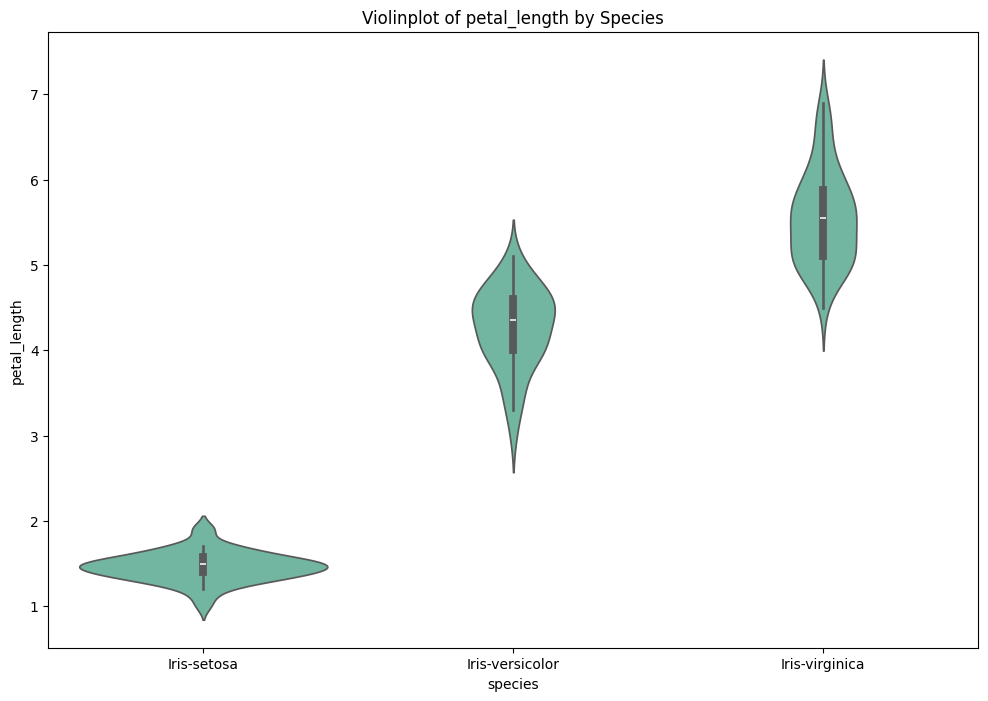

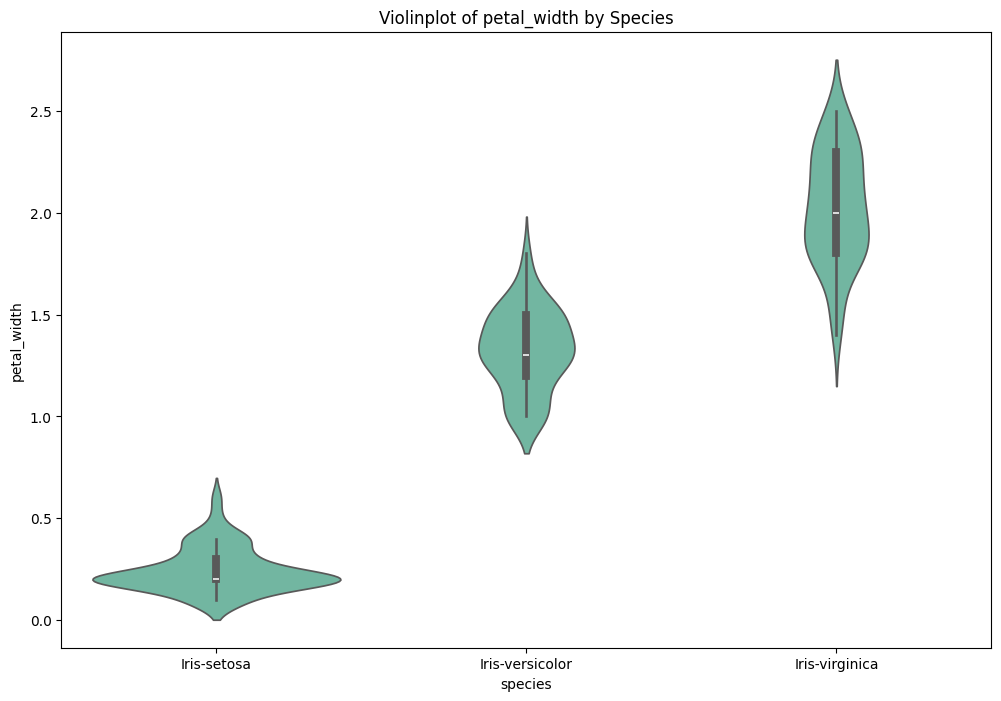

In [13]:
for value in df.drop(columns=['species']):
    plt.figure(figsize=(12, 8))
    sns.violinplot(data = df , x = 'species', y = df[value])
    plt.title(f'Violinplot of {value} by Species')
    plt.show()

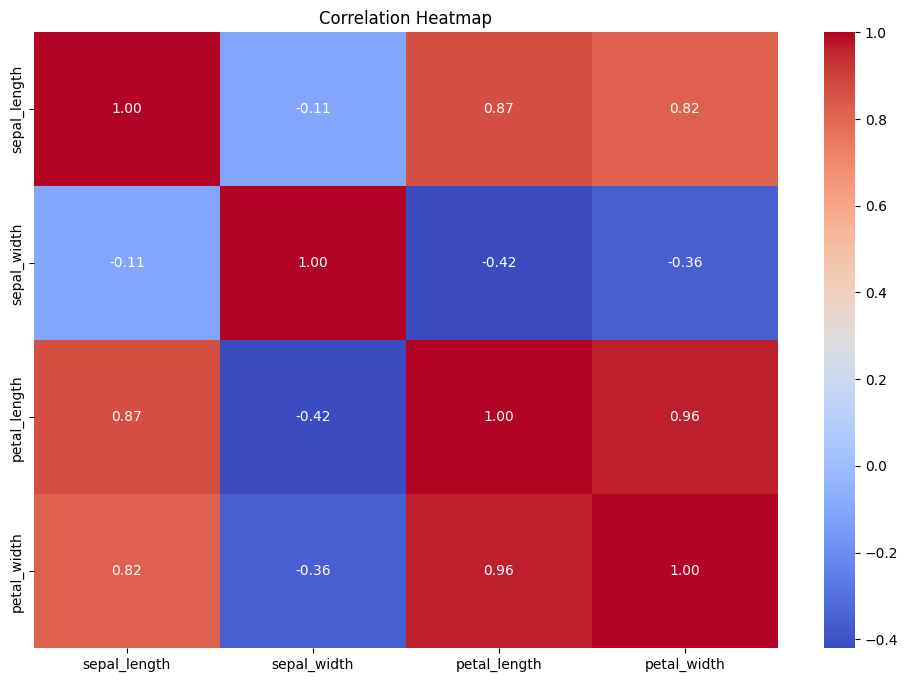

In [14]:
plt.figure(figsize=(12, 8))
correlation = data.drop(columns=['species']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

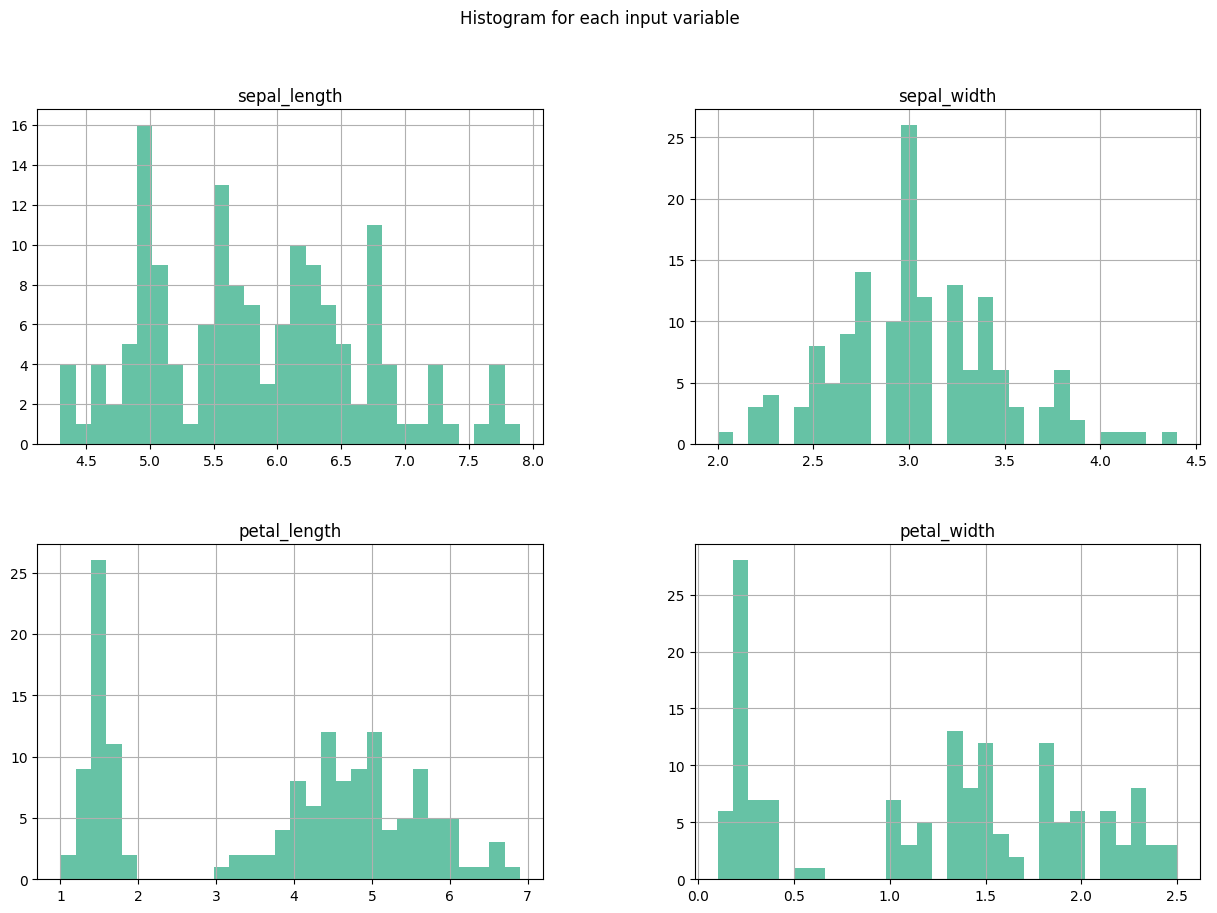

In [15]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram for each input variable")
plt.show()

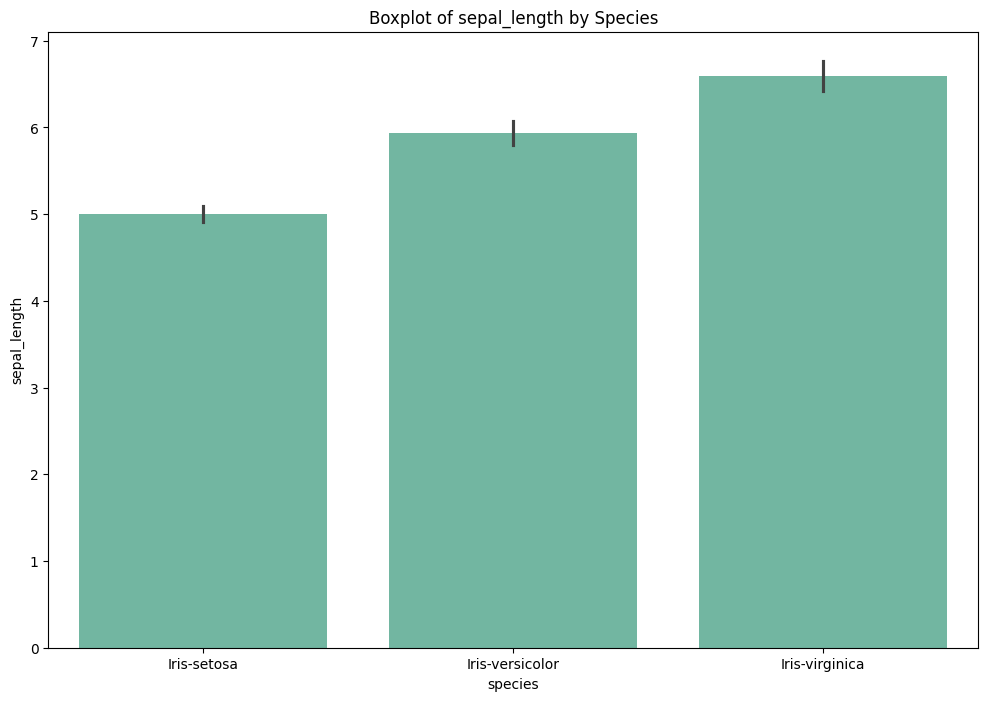

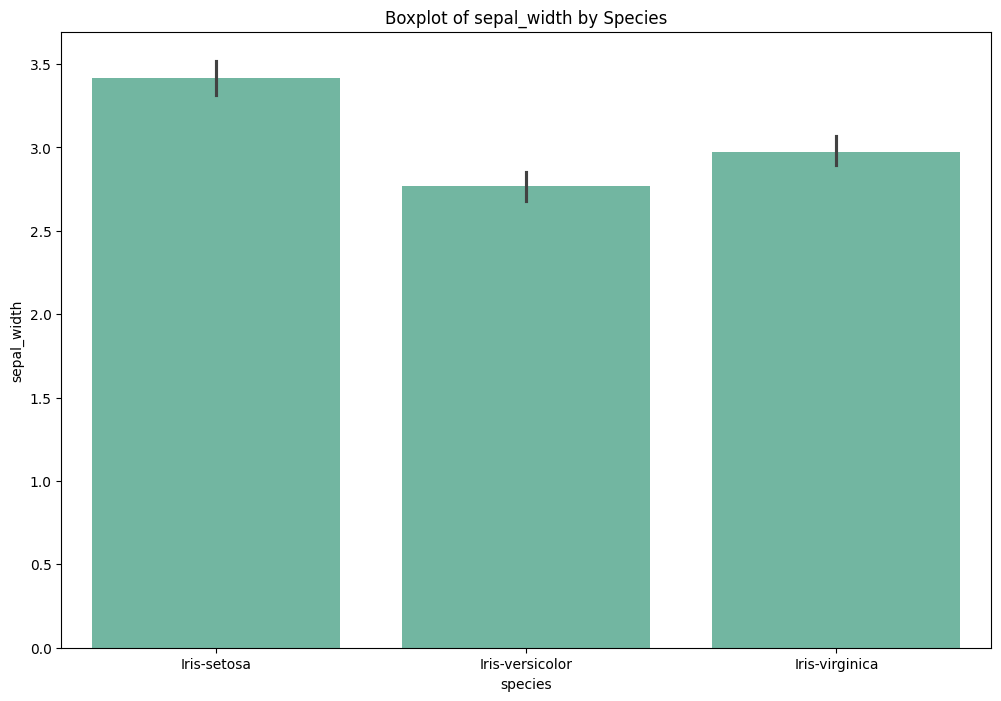

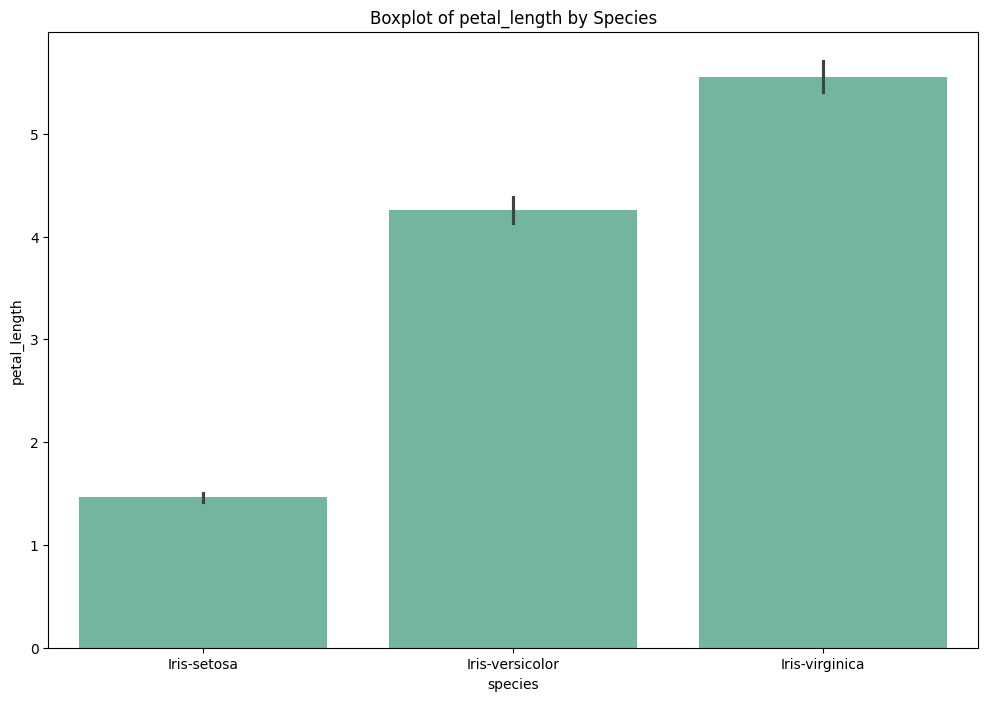

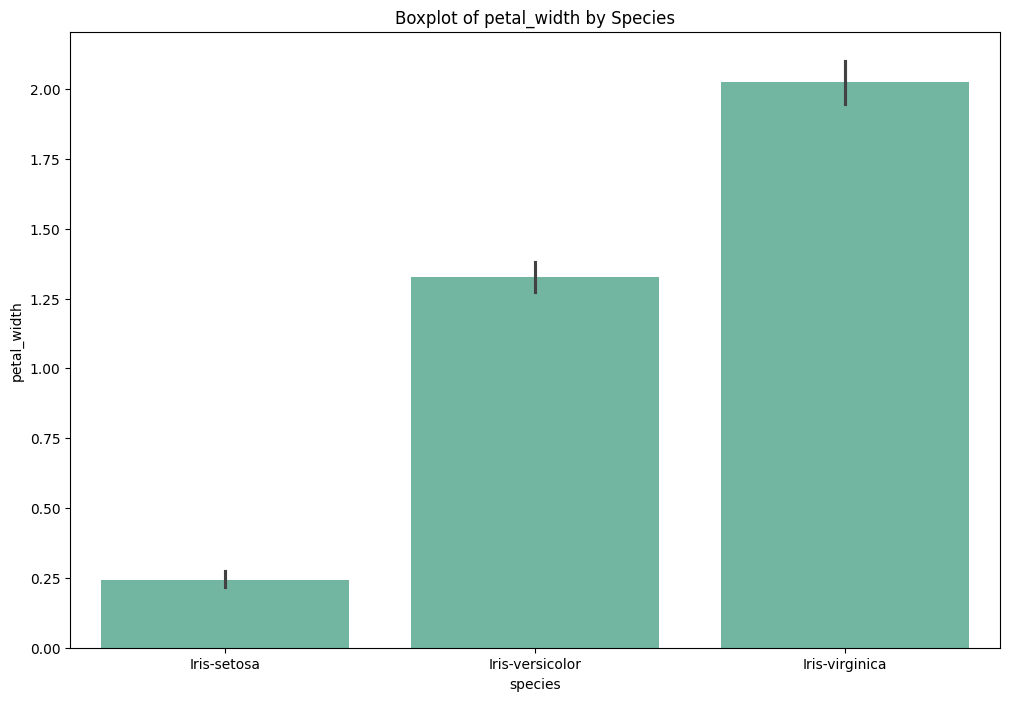

In [16]:
for value in df.drop(columns=['species']):
    plt.figure(figsize=(12, 8))
    sns.barplot(data = df , x = 'species', y = df[value])
    plt.title(f'Boxplot of {value} by Species')
    plt.show()

In [17]:
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

In [18]:
X = data.drop(columns=['species'])
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [19]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9866666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.96      1.00      0.98        23
           2       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [21]:
new_data = pd.DataFrame({
    'sepal_length': [5.1, 6.5],
    'sepal_width': [3.5, 3.0],
    'petal_length': [1.4, 5.5],
    'petal_width': [0.2, 2.0]
})

# Make predictions
predictions = model.predict(new_data)
predicted_species = le.inverse_transform(predictions)
print(predicted_species)
print(predictions)

['Iris-setosa' 'Iris-virginica']
[0 2]
